# Linear Regression

Here, we will learn how to code Linear Regression from scratch and then we will see how it works.

In [1]:
import numpy as np
import pickle


class LinearRegression:

    def __init__(self):
        self.__theta = None #model parameters
        self.__testDone = False #flag

    ''' 
        fit() method takes three parameters X,Y, and lambda
        X: feature matrix of type numpy.matrix
        Y: output/target matrix of type numpy.matrix
        l: regularization parameter with a default value of 1
        The method uses Normal Equation to get the optimised parameters which will give the best fit for our data.
    '''
    def fit(self,X,Y,l=1):
        n = X.shape[1]
        X=np.matrix(np.insert(X,0,np.ones(shape=(1,X.shape[0]),dtype=float),axis=1))
        regularization_term = np.insert(np.eye(n),0,0,axis=1)
        regularization_term = l*np.matrix(np.insert(regularization_term,0,0,axis=0))
        theta = np.linalg.pinv(X.T*X + regularization_term)*X.T*Y
        self.__theta = theta
        self.__testDone = True
        
    
    '''
        predict() method takes one parameter X
        X: feature matrix of type numpy.matrix
        It returns the predicted values/output as numpy array
    '''
    def predict(self,X):
        if self.__testDone:
            X = np.insert(X, 0, 1, axis=1)
            return X * self.__theta
        else:
            print("First train the classifier to make predictons")
            return

        
    '''
        save_model() method saves the training model to the disk.
    '''
    def save_model(self):
        with open("model.lr", 'wb') as f:
            pickle._dump(self,f)
        return

    
    '''
        load_model() method loads training model from the disk.
    '''
    def load_model(self):
        pickle_in = open("model.lr", 'rb')
        model_obj = pickle.load(pickle_in)
        self.__theta = model_obj.__theta
        self.__testDone = model_obj.__testDone
        return

    
    '''
        accuracy() method gives a way to summarize how well a linear regression model fits the data.
        It is the proportion of variation in the forecast variable that is accounted for (or explained) 
        by the regression model.
        If the predictions are close to the actual values, we would expect the output of the method
        to be close to 1. On the other hand, if the predictions are unrelated to the actual values, 
        then output will be close to 0. In all cases, output lies between 0 and 1.
    '''
    def accuracy(self,predicted,actual):
        mean = np.mean(actual)
        acc = np.sum(np.power((predicted-mean),2))/np.sum(np.power((actual-mean),2))
        return acc

### Now we will use the class for solving the following problem:

Suppose you are the CEO of arestaurant franchise and are considering different cities for opening a new
outlet. The chain already has trucks in various cities and you have data forprofits and populations from the cities.
You would like to use this data to help you select which city to expand to next.

The file <b>lr_data.csv"</b> contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss.

Here we will implement linear regression with one variable (feature) to predict profits for a food truck.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt


#-------------Reading data from the data file('lr_data.csv')---------------
df = pd.read_csv('../data/lr_data.csv', header=None)
df = df.rename(columns={0:'Population in 10,000s',
                        1: 'Profit in $10,000s'})


/home/hackingbot/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


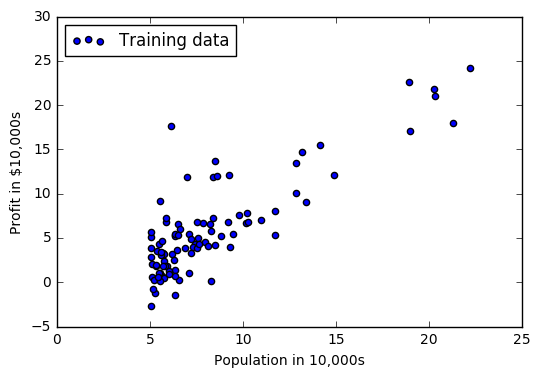

In [3]:
#----------------Creating feature matrix and the output matrix------------------
x= df.as_matrix(['Population in 10,000s'])
y= df.as_matrix(['Profit in $10,000s'])


#------------------------Visualising the training data--------------------------
plt.figure(1)
plt.scatter(x[:,-1],y)
plt.xlabel('Population in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(['Training data'],loc=2)
plt.show()

In [4]:
#-----------------------Creating and training the model-------------------------
clf = LinearRegression()
clf.fit(x,y,1)

#-----------------Predicting the output for the training set--------------------
predictions = clf.predict(x)


Remember the scatter plot from before? Let's overlay a line representing our model on top of a scatter plot of the data to see how well it fits.

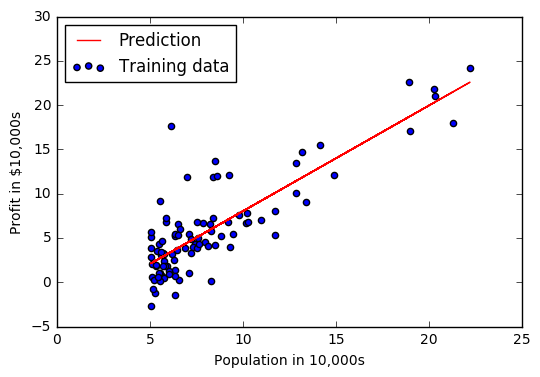

In [5]:
#------------------------Visualising the predictions----------------------------
plt.figure(2)
plt.scatter(x[:,-1],y)
plt.plot(x[:,-1],predictions,'r')
plt.xlabel('Population in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(['Prediction','Training data'],loc=2)
plt.show()


### Not bad! Our solution looks like and optimal linear model of the data set.